In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)

# Define base monthly data
df_monthly = pd.DataFrame({
    'Month': ["January", "February", "March", "April", "May", "June",
              "July", "August", "September", "October", "November", "December"],
    'Cases': [10, 6, 7, 19, 22, 23, 24, 20, 18, 10, 10, 4]
})
df_monthly['Month_Num'] = range(1, 13)
df_monthly['Temperature_C'] = np.round(np.random.normal(loc=10 + 10 * np.sin((df_monthly['Month_Num'] - 1) / 12 * 2 * np.pi), scale=3), 1)
df_monthly['Humidity_%'] = np.clip(np.random.normal(70, 10, size=len(df_monthly)), 40, 100).astype(int)

# Expand by region
regions = [
    "East Midlands", "East of England", "London", "North East", "North West", "Scotland",
    "South East", "South West", "Wales", "West Midlands", "Yorkshire and The Humber"
]
df_expanded = pd.concat([df_monthly.assign(Region=region) for region in regions], ignore_index=True)

# Add variation and year
df_expanded['Temperature_C'] += np.random.normal(0, 1.5, len(df_expanded))
df_expanded['Humidity_%'] += np.random.normal(0, 5, len(df_expanded))
df_expanded['Humidity_%'] = df_expanded['Humidity_%'].clip(40, 100)

years = np.tile(np.arange(2012, 2025), int(np.ceil(len(df_expanded) / 13)))[:len(df_expanded)]
df_expanded['Year'] = years

# Risk classification
df_expanded['Risk_Level'] = pd.cut(
    df_expanded['Cases'],
    bins=[-1, 6, 12, 18, np.inf],
    labels=['Low', 'Medium', 'High', 'Very High']
)
df_expanded['Risk_Level'] = pd.Categorical(
    df_expanded['Risk_Level'],
    categories=['Low', 'Medium', 'High', 'Very High'],
    ordered=True
)
df_expanded['Risk_Code'] = df_expanded['Risk_Level'].cat.codes


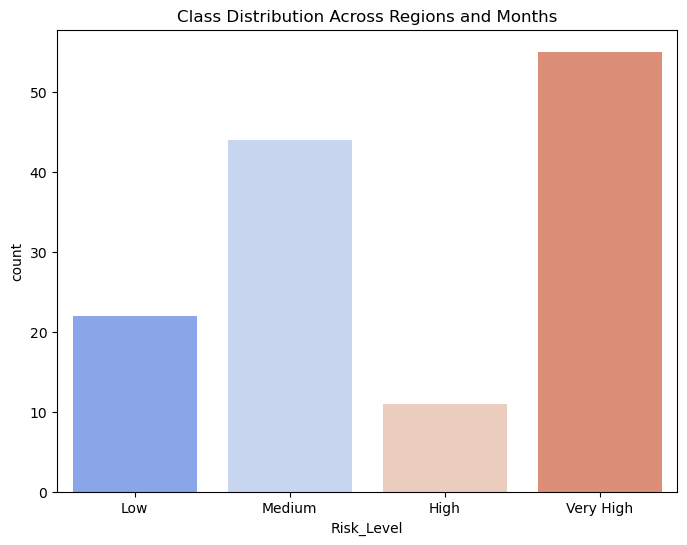

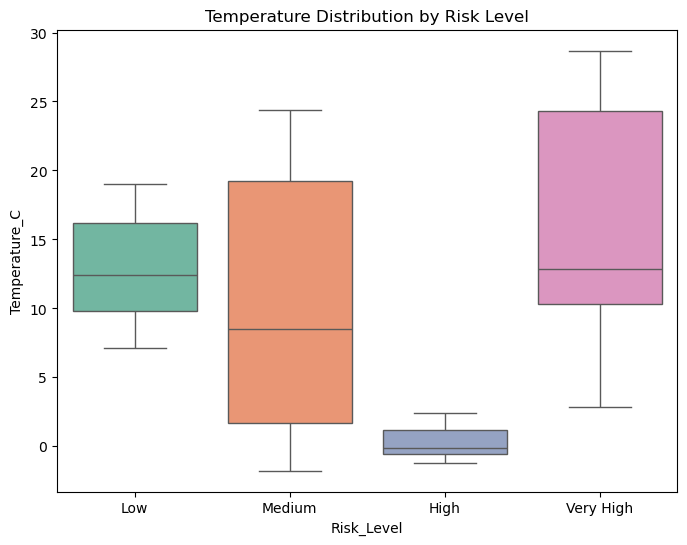

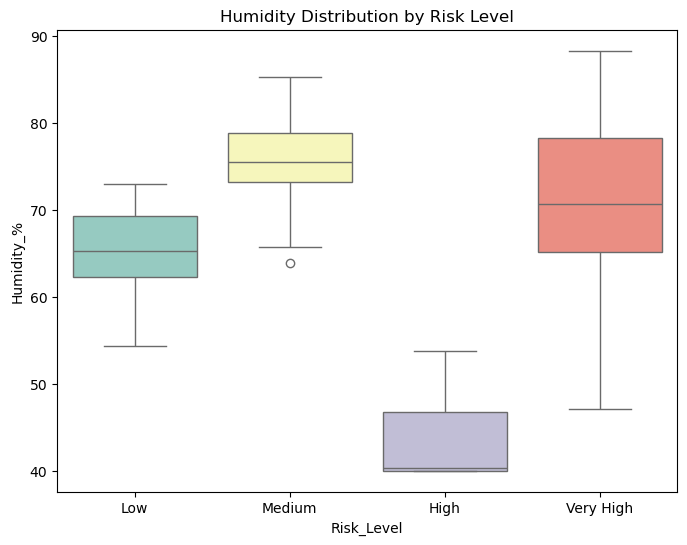

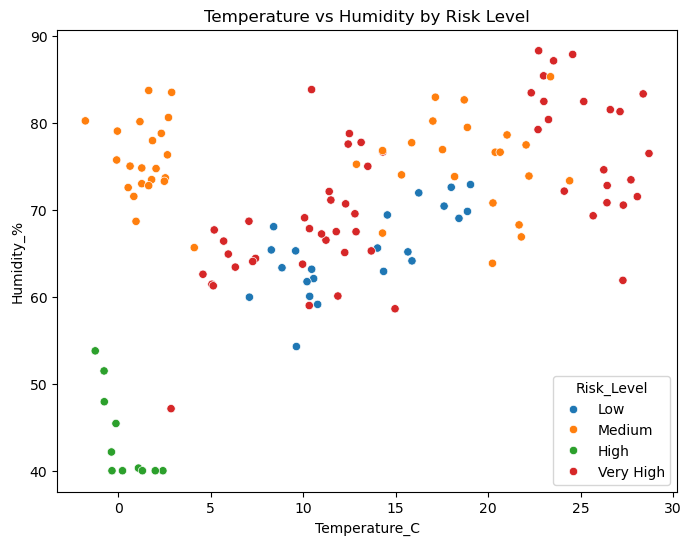

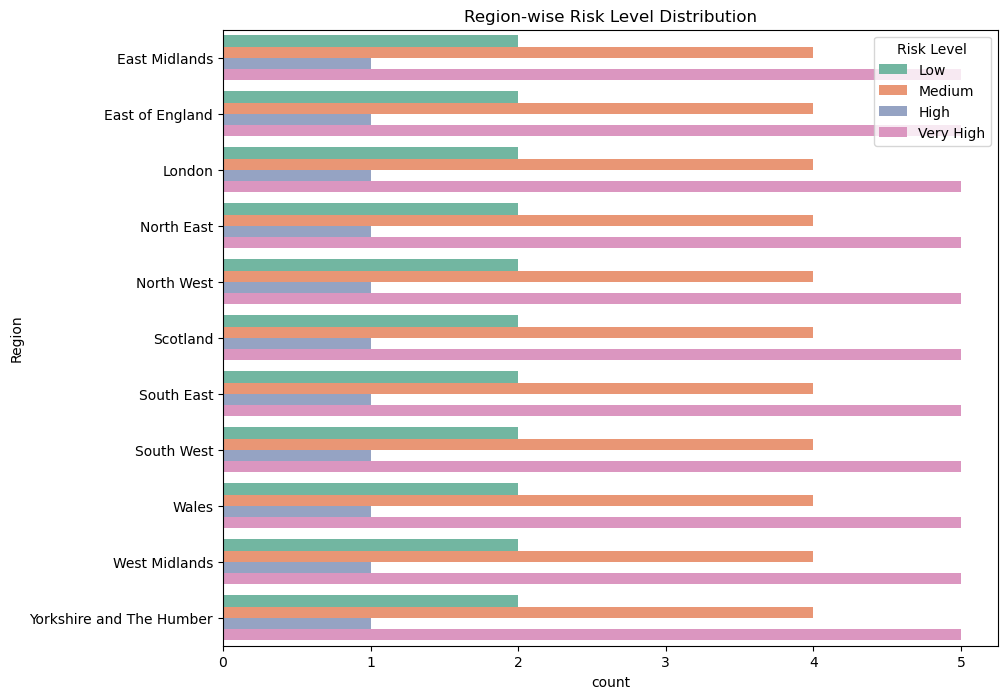

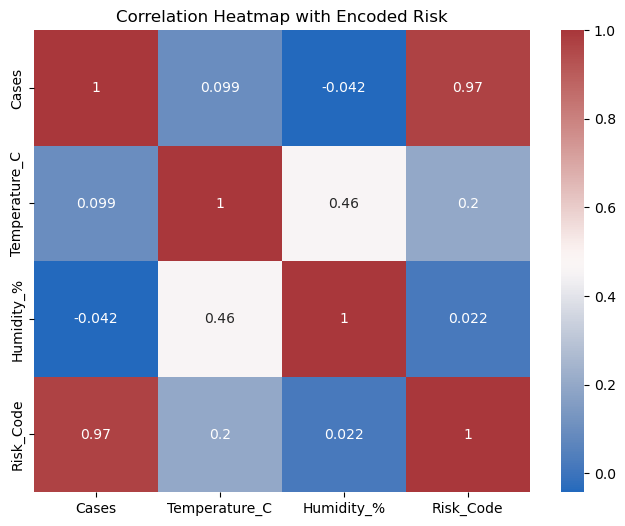

In [9]:
# VISUALISATIONS

# 1. Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_expanded, x='Risk_Level', hue='Risk_Level', palette='coolwarm', legend=False)
plt.title("Class Distribution Across Regions and Months")
plt.show()

# 2. Temperature by Class
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_expanded, x='Risk_Level', y='Temperature_C', hue='Risk_Level', palette='Set2', legend=False)
plt.title("Temperature Distribution by Risk Level")
plt.show()

# 3. Humidity by Class
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_expanded, x='Risk_Level', y='Humidity_%', hue='Risk_Level', palette='Set3', legend=False)
plt.title("Humidity Distribution by Risk Level")
plt.show()

# 4. Temperature vs Humidity Scatter
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_expanded, x='Temperature_C', y='Humidity_%', hue='Risk_Level', palette='tab10')
plt.title("Temperature vs Humidity by Risk Level")
plt.show()

# 5. Region-wise Risk Count
plt.figure(figsize=(10, 8))
sns.countplot(data=df_expanded, y='Region', hue='Risk_Level', order=df_expanded['Region'].value_counts().index, palette='Set2')
plt.title("Region-wise Risk Level Distribution")
plt.legend(title='Risk Level')
plt.show()

# 6. Correlation Heatmap
plt.figure(figsize=(8, 6))
corr_data = df_expanded[['Cases', 'Temperature_C', 'Humidity_%', 'Risk_Code']].corr()
sns.heatmap(corr_data, annot=True, cmap='vlag')
plt.title("Correlation Heatmap with Encoded Risk")
plt.show()
